In [1]:
# --------------------------------------------------------------------
# Nome do Arquivo : compiler_comparison.ipynb
# Autor           : Vinicius Silva
# Descrição       : Análise dos experimentos 'compiler_comparison'
# Data de Criação : 09/05/2025
# Versão          : 1.0
# --------------------------------------------------------------------

In [4]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from adjustText import adjust_text

In [5]:
dtype = {'binary_size': float, 'time_of_compilation':float, 'time_of_execution': float, 'opt':str, 'compiler':str, 'program': str, 'data_structure': str, 'iterations': int}
dataframe = pd.read_csv("compilers_comparation.csv", sep=",", dtype=dtype)

In [6]:
dataframe['binary_size'] = dataframe['binary_size']/1024 # Converting byte to KB

### Data Structure: Array
### Program:
<html>
A = LOOP(B C contains);

B = IF(new LOOP(remove contains) D, CALL(new A remove contains));   
C = new CALL(new D LOOP(insert) contains) B;   
D = CALL(IF(CALL(A),CALL(B)) CALL(C));
</html>

### Iterations: 8

In [7]:
array_ex8_8 = dataframe[(dataframe['data_structure'] == 'array') & (dataframe['program'] == 'ex8') & (dataframe['iterations'] == 8)]

In [8]:
data_grouped = array_ex8_8.groupby(['compiler', 'opt']).agg({'binary_size': ['mean', 'median'], 'compilation_time': ['mean', 'median'], 'execution_time': ['mean', 'median']})

In [9]:
data_grouped.reset_index()
data_grouped.columns = ['_'.join(col).strip() for col in data_grouped.columns.values]

Text(0.03, -0.15, '\n                Specification of Automatically Generated Program:\n\nData Structure: Array\n\nGrammar:\nA = LOOP(B C contains);\nB = IF(new LOOP(remove contains) D, CALL(new A remove contains));\nC = new CALL(new D LOOP(insert) contains) B;\nD = CALL(IF(CALL(A),CALL(B)) CALL(C));\n\nIterations: 8\n')

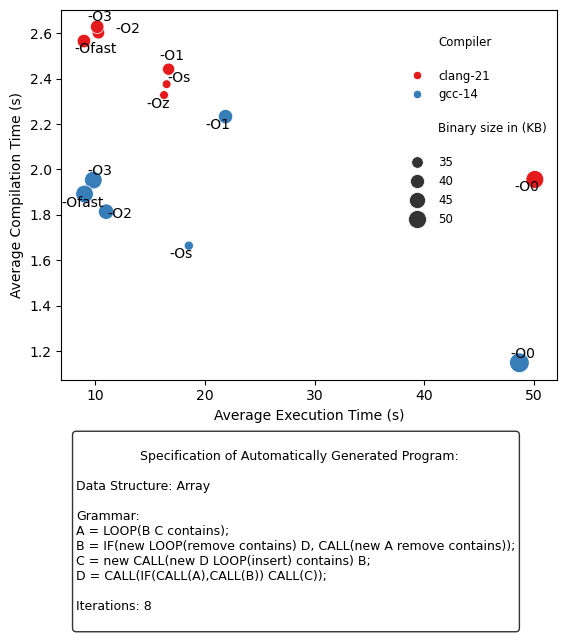

In [13]:
scatter = sb.scatterplot(data=data_grouped, x='execution_time_mean', y='compilation_time_mean', hue='compiler', size='binary_size_mean', sizes=(40, 200), hue_norm=(0, 7), palette='Set1')
scatter.legend(
    #title='Tempo de compilação',
    loc='upper right',
    #bbox_to_anchor=(1, 0.5),
    framealpha=0,
    prop={'size': 8.5},
)

for text in scatter.legend_.get_texts():
    if text.get_text() == 'binary_size_mean':
        text.set_text('\nBinary size in (KB)\n')
    elif text.get_text() == 'compiler':
        text.set_text('\nCompiler\n')
        
texts = []
for i, row in data_grouped.iterrows():
    texts.append(plt.text(
        row['execution_time_mean'],
        row['compilation_time_mean'],
        row.name[1],
        fontsize=10,
        ha='center',
        va='center'
    ))

adjust_text(texts)
scatter.set_xlabel('Average Execution Time (s)')
scatter.set_ylabel('Average Compilation Time (s)')

texto_adicional = """
                Specification of Automatically Generated Program:\n
Data Structure: Array\n
Grammar:
A = LOOP(B C contains);
B = IF(new LOOP(remove contains) D, CALL(new A remove contains));
C = new CALL(new D LOOP(insert) contains) B;
D = CALL(IF(CALL(A),CALL(B)) CALL(C));\n
Iterations: 8
"""

plt.text(
    0.03,
    -0.15,
    texto_adicional,
    fontsize=9,
    color='black',
    ha='left',
    va='top',
    transform=plt.gca().transAxes,
    bbox=dict(facecolor='white', alpha=0.8, edgecolor='black', boxstyle='round')
)

### Data Structure: Array
### Program:
<html>
A = LOOP(B C contains);

B = IF(new LOOP(remove contains) D, CALL(new A remove contains));   
C = new CALL(new D LOOP(insert) contains) B;   
D = CALL(IF(CALL(A),CALL(B)) CALL(C));
</html>

### Iterations: 10

In [8]:
array_ex8_12 = dataframe[(dataframe['data_structure'] == 'array') & (dataframe['program'] == 'ex8') & (dataframe['iterations'] == 10)]

In [9]:
data_grouped = array_ex8_12.groupby(['compiler', 'opt']).agg({'binary_size': ['mean', 'median', 'std'], 'compilation_time': ['mean', 'median', 'std'], 'execution_time': ['mean', 'median', 'std']})

In [10]:
data_grouped.reset_index()
data_grouped.columns = ['_'.join(col).strip() for col in data_grouped.columns.values]

Text(0.03, -0.15, '\n                Specification of Automatically Generated Program:\n\nData Structure: Array\n\nGrammar:\nA = LOOP(B C contains);\nB = IF(new LOOP(remove contains) D, CALL(new A remove contains));\nC = new CALL(new D LOOP(insert) contains) B;\nD = CALL(IF(CALL(A),CALL(B)) CALL(C));\n\nIterations: 10\n')

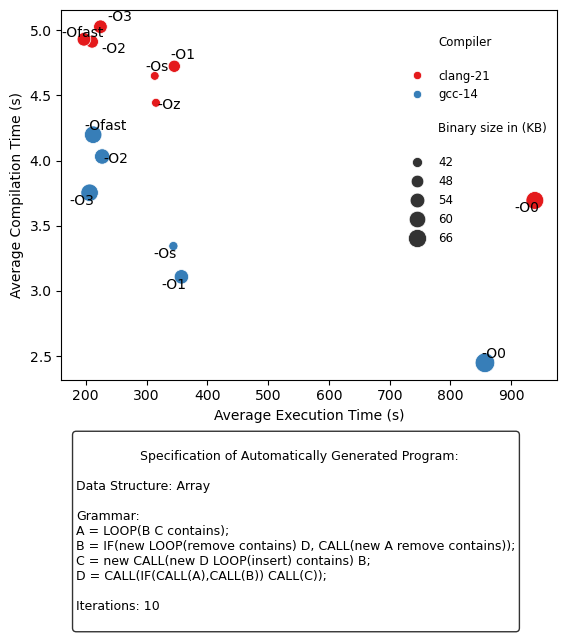

In [11]:
scatter = sb.scatterplot(data=data_grouped, x='execution_time_mean', y='compilation_time_mean', hue='compiler', size='binary_size_mean', sizes=(40, 200), hue_norm=(0, 7), palette='Set1')
scatter.legend(
    #title='Tempo de compilação',
    loc='upper right',
    #bbox_to_anchor=(1, 0.5),
    framealpha=0,
    prop={'size': 8.5},
)

for text in scatter.legend_.get_texts():
    if text.get_text() == 'binary_size_mean':
        text.set_text('\nBinary size in (KB)\n')
    elif text.get_text() == 'compiler':
        text.set_text('\nCompiler\n')
        
texts = []
for i, row in data_grouped.iterrows():
    texts.append(plt.text(
        row['execution_time_mean'],
        row['compilation_time_mean'],
        row.name[1],
        fontsize=10,
        ha='center',
        va='center'
    ))

adjust_text(texts)
scatter.set_xlabel('Average Execution Time (s)')
scatter.set_ylabel('Average Compilation Time (s)')

texto_adicional = """
                Specification of Automatically Generated Program:\n
Data Structure: Array\n
Grammar:
A = LOOP(B C contains);
B = IF(new LOOP(remove contains) D, CALL(new A remove contains));
C = new CALL(new D LOOP(insert) contains) B;
D = CALL(IF(CALL(A),CALL(B)) CALL(C));\n
Iterations: 10
"""

plt.text(
    0.03,
    -0.15,
    texto_adicional,
    fontsize=9,
    color='black',
    ha='left',
    va='top',
    transform=plt.gca().transAxes,
    bbox=dict(facecolor='white', alpha=0.8, edgecolor='black', boxstyle='round')
)

### Data Structure: Array
### Program:
<html>
A = new IF(LOOP(new remove contains),CALL(new B contains));   
    
B = LOOP(remove) C LOOP(insert) CALL(D);   
C = A CALL(new IF(B,D) LOOP(insert D));   
D = new insert contains remove C;   
</html>

### Iterations: 8

In [12]:
array_ex9_8 = dataframe[(dataframe['data_structure'] == 'array') & (dataframe['program'] == 'ex9') & (dataframe['iterations'] == 8)]

In [13]:
data_grouped = array_ex9_8.groupby(['compiler', 'opt']).agg({'binary_size': ['mean', 'median', 'std'], 'compilation_time': ['mean', 'median', 'std'], 'execution_time': ['mean', 'median', 'std']})

In [14]:
data_grouped.reset_index()
data_grouped.columns = ['_'.join(col).strip() for col in data_grouped.columns.values]

####Esse foi selecionado e as maiores tempos de execução

Text(0.03, -0.15, '\n                Specification of Automatically Generated Program:\n\nData Structure: Array\n\nGrammar:\nA = new IF(LOOP(new remove contains),CALL(new B contains));      \nB = LOOP(remove) C LOOP(insert) CALL(D);   \nC = A CALL(new IF(B,D) LOOP(insert D));   \nD = new insert contains remove C;\n\nIterations: 8\n')

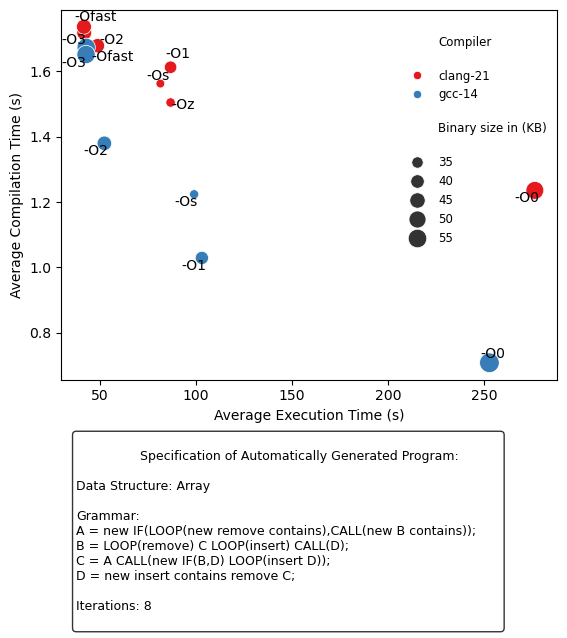

In [15]:
scatter = sb.scatterplot(data=data_grouped, x='execution_time_mean', y='compilation_time_mean', hue='compiler', size='binary_size_mean', sizes=(40, 200), hue_norm=(0, 7), palette='Set1')
scatter.legend(
    #title='Tempo de compilação',
    loc='upper right',
   # bbox_to_anchor=(1, 0.5),
    framealpha=0,
    prop={'size': 8.5},
)

for text in scatter.legend_.get_texts():
    if text.get_text() == 'binary_size_mean':
        text.set_text('\nBinary size in (KB)\n')
    elif text.get_text() == 'compiler':
        text.set_text('\nCompiler\n')
        
texts = []
for i, row in data_grouped.iterrows():
    texts.append(plt.text(
        row['execution_time_mean'],
        row['compilation_time_mean'],
        row.name[1],
        fontsize=10,
        ha='center',
        va='center'
    ))

adjust_text(texts)
scatter.set_xlabel('Average Execution Time (s)')
scatter.set_ylabel('Average Compilation Time (s)')

texto_adicional = """
                Specification of Automatically Generated Program:\n
Data Structure: Array\n
Grammar:
A = new IF(LOOP(new remove contains),CALL(new B contains));      
B = LOOP(remove) C LOOP(insert) CALL(D);   
C = A CALL(new IF(B,D) LOOP(insert D));   
D = new insert contains remove C;\n
Iterations: 8
"""

plt.text(
    0.03,
    -0.15,
    texto_adicional,
    fontsize=9,
    color='black',
    ha='left',
    va='top',
    transform=plt.gca().transAxes,
    bbox=dict(facecolor='white', alpha=0.8, edgecolor='black', boxstyle='round')
)

### Data Structure: Array
### Program:
<html>
A = new IF(LOOP(new remove contains),CALL(new B contains));   
    
B = LOOP(remove) C LOOP(insert) CALL(D);   
C = A CALL(new IF(B,D) LOOP(insert D));   
D = new insert contains remove C;   
</html>

### Iterations: 10

In [16]:
array_ex9_12 = dataframe[(dataframe['data_structure'] == 'array') & (dataframe['program'] == 'ex9') & (dataframe['iterations'] == 10)]

In [17]:
data_grouped = array_ex9_12.groupby(['compiler', 'opt']).agg({'binary_size': ['mean', 'median', 'std'], 'compilation_time': ['mean', 'median', 'std'], 'execution_time': ['mean', 'median', 'std']})

In [18]:
data_grouped.reset_index()
data_grouped.columns = ['_'.join(col).strip() for col in data_grouped.columns.values]

Text(0.03, -0.15, '\n            Specification of Automatically Generated Program:\n\nData Structure: Array\n\nGrammar:\nA = new IF(LOOP(new remove contains),CALL(new B contains));      \nB = LOOP(remove) C LOOP(insert) CALL(D);   \nC = A CALL(new IF(B,D) LOOP(insert D));   \nD = new insert contains remove C;\n\nIterations: 10\n')

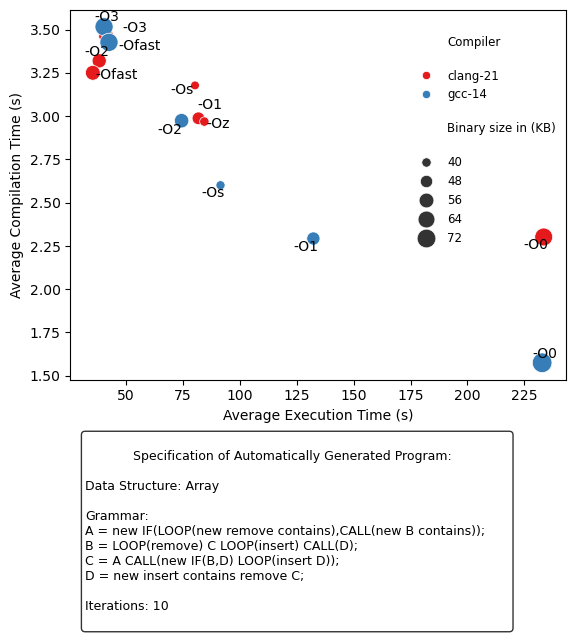

In [19]:
scatter = sb.scatterplot(data=data_grouped, x='execution_time_mean', y='compilation_time_mean', hue='compiler', size='binary_size_mean', sizes=(40, 200), hue_norm=(0, 7), palette='Set1')
scatter.legend(
    #title='Tempo de compilação',
    loc='upper right',
    #bbox_to_anchor=(1, 0.5),
    framealpha=0,
    prop={'size': 8.5},
)

for text in scatter.legend_.get_texts():
    if text.get_text() == 'binary_size_mean':
        text.set_text('\nBinary size in (KB)\n')
    elif text.get_text() == 'compiler':
        text.set_text('\nCompiler\n')
        
texts = []
for i, row in data_grouped.iterrows():
    texts.append(plt.text(
        row['execution_time_mean'],
        row['compilation_time_mean'],
        row.name[1],
        fontsize=10,
        ha='center',
        va='center'
    ))

adjust_text(texts)
scatter.set_xlabel('Average Execution Time (s)')
scatter.set_ylabel('Average Compilation Time (s)')

texto_adicional = """
            Specification of Automatically Generated Program:\n
Data Structure: Array\n
Grammar:
A = new IF(LOOP(new remove contains),CALL(new B contains));      
B = LOOP(remove) C LOOP(insert) CALL(D);   
C = A CALL(new IF(B,D) LOOP(insert D));   
D = new insert contains remove C;\n
Iterations: 10
"""

plt.text(
    0.03,
    -0.15,
    texto_adicional,
    fontsize=9,
    color='black',
    ha='left',
    va='top',
    transform=plt.gca().transAxes,
    bbox=dict(facecolor='white', alpha=0.8, edgecolor='black', boxstyle='round')
)

In [20]:
sortedlist_ex8_8 = dataframe[(dataframe['data_structure'] == 'sortedlist') & (dataframe['program'] == 'ex8') & (dataframe['iterations'] == 8)]

In [21]:
data_grouped = sortedlist_ex8_8.groupby(['compiler', 'opt']).agg({'binary_size': ['mean', 'median', 'std'], 'compilation_time': ['mean', 'median', 'std'], 'execution_time': ['mean', 'median', 'std']})

In [22]:
data_grouped.reset_index()
data_grouped.columns = ['_'.join(col).strip() for col in data_grouped.columns.values]

Text(0.03, -0.15, '\n            Specification of Automatically Generated Program:\n\nData Structure: SortedList\n\nGrammar:\nA = LOOP(B C contains);\nB = IF(new LOOP(remove contains) D, CALL(new A remove contains));   \nC = new CALL(new D LOOP(insert) contains) B;   \nD = CALL(IF(CALL(A),CALL(B)) CALL(C));\n\nIterations: 8\n')

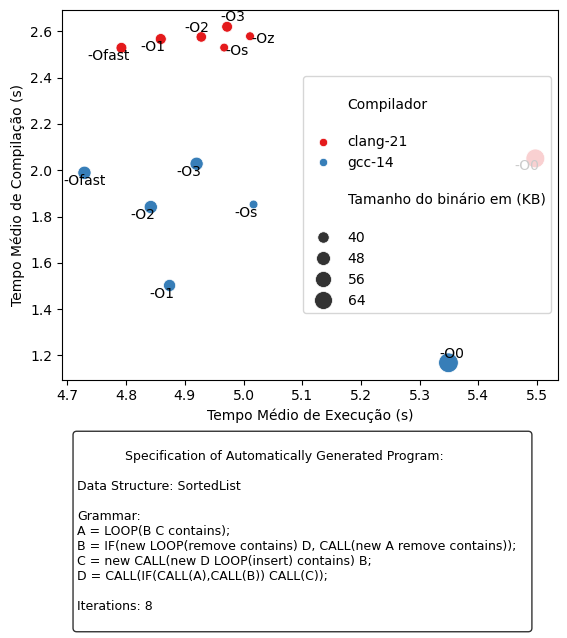

In [23]:
scatter = sb.scatterplot(data=data_grouped, x='execution_time_mean', y='compilation_time_mean', hue='compiler', size='binary_size_mean', sizes=(40, 200), hue_norm=(0, 7), palette='Set1')
scatter.legend(
    #title='Tempo de compilação',
    loc='right',
    bbox_to_anchor=(1, 0.5)
)

for text in scatter.legend_.get_texts():
    if text.get_text() == 'binary_size_mean':
        text.set_text('\nTamanho do binário em (KB)\n')
    elif text.get_text() == 'compiler':
        text.set_text('\nCompilador\n')
        
texts = []
for i, row in data_grouped.iterrows():
    texts.append(plt.text(
        row['execution_time_mean'],
        row['compilation_time_mean'],
        row.name[1],
        fontsize=10,
        ha='center',
        va='center'
    ))

adjust_text(texts)
scatter.set_xlabel('Tempo Médio de Execução (s)')
scatter.set_ylabel('Tempo Médio de Compilação (s)')

texto_adicional = """
            Specification of Automatically Generated Program:\n
Data Structure: SortedList\n
Grammar:
A = LOOP(B C contains);
B = IF(new LOOP(remove contains) D, CALL(new A remove contains));   
C = new CALL(new D LOOP(insert) contains) B;   
D = CALL(IF(CALL(A),CALL(B)) CALL(C));\n
Iterations: 8
"""

plt.text(
    0.03,
    -0.15,
    texto_adicional,
    fontsize=9,
    color='black',
    ha='left',
    va='top',
    transform=plt.gca().transAxes,
    bbox=dict(facecolor='white', alpha=0.8, edgecolor='black', boxstyle='round')
)

In [24]:
sortedlist_ex8_12 = dataframe[(dataframe['data_structure'] == 'sortedlist') & (dataframe['program'] == 'ex8') & (dataframe['iterations'] == 10)]

In [25]:
data_grouped = sortedlist_ex8_12.groupby(['compiler', 'opt']).agg({'binary_size': ['mean', 'median', 'std'], 'compilation_time': ['mean', 'median', 'std'], 'execution_time': ['mean', 'median', 'std']})

In [26]:
data_grouped.reset_index()
data_grouped.columns = ['_'.join(col).strip() for col in data_grouped.columns.values]

Text(0.03, -0.15, '\n            Specification of Automatically Generated Program:\n\nData Structure: SortedList\n\nGrammar:\nA = LOOP(B C contains);\nB = IF(new LOOP(remove contains) D, CALL(new A remove contains));   \nC = new CALL(new D LOOP(insert) contains) B;   \nD = CALL(IF(CALL(A),CALL(B)) CALL(C));\n\nIterations: 10\n')

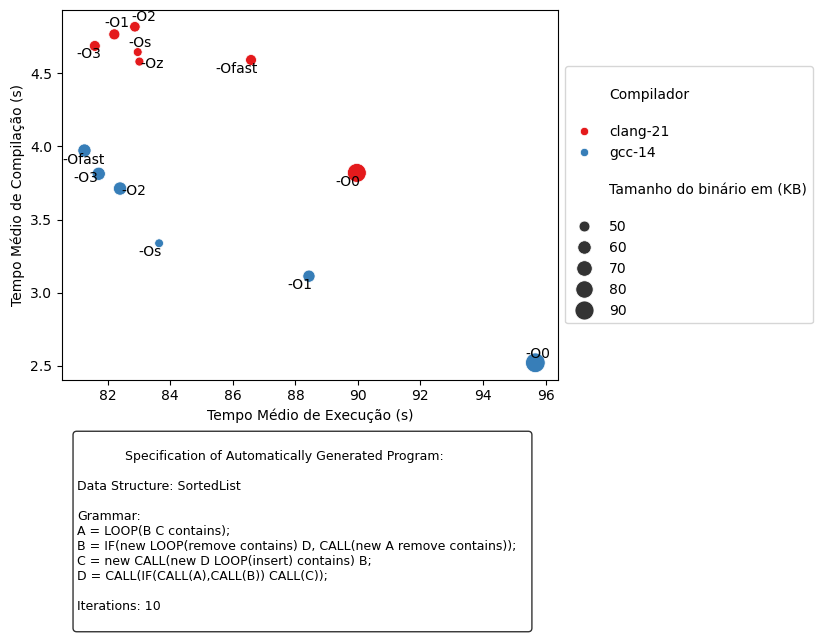

In [27]:
scatter = sb.scatterplot(data=data_grouped, x='execution_time_mean', y='compilation_time_mean', hue='compiler', size='binary_size_mean', sizes=(40, 200), hue_norm=(0, 7), palette='Set1')
scatter.legend(
    #title='Tempo de compilação',
    loc='center left',
    bbox_to_anchor=(1, 0.5)
)

for text in scatter.legend_.get_texts():
    if text.get_text() == 'binary_size_mean':
        text.set_text('\nTamanho do binário em (KB)\n')
    elif text.get_text() == 'compiler':
        text.set_text('\nCompilador\n')
        
texts = []
for i, row in data_grouped.iterrows():
    texts.append(plt.text(
        row['execution_time_mean'],
        row['compilation_time_mean'],
        row.name[1],
        fontsize=10,
        ha='center',
        va='center'
    ))

adjust_text(texts)
scatter.set_xlabel('Tempo Médio de Execução (s)')
scatter.set_ylabel('Tempo Médio de Compilação (s)')

texto_adicional = """
            Specification of Automatically Generated Program:\n
Data Structure: SortedList\n
Grammar:
A = LOOP(B C contains);
B = IF(new LOOP(remove contains) D, CALL(new A remove contains));   
C = new CALL(new D LOOP(insert) contains) B;   
D = CALL(IF(CALL(A),CALL(B)) CALL(C));\n
Iterations: 10
"""

plt.text(
    0.03,
    -0.15,
    texto_adicional,
    fontsize=9,
    color='black',
    ha='left',
    va='top',
    transform=plt.gca().transAxes,
    bbox=dict(facecolor='white', alpha=0.8, edgecolor='black', boxstyle='round')
)

In [28]:
sortedlist_ex9_8 = dataframe[(dataframe['data_structure'] == 'sortedlist') & (dataframe['program'] == 'ex9') & (dataframe['iterations'] == 8)]

In [29]:
data_grouped = sortedlist_ex9_8.groupby(['compiler', 'opt']).agg({'binary_size': ['mean', 'median', 'std'], 'compilation_time': ['mean', 'median', 'std'], 'execution_time': ['mean', 'median', 'std']})

In [30]:
data_grouped.reset_index()
data_grouped.columns = ['_'.join(col).strip() for col in data_grouped.columns.values]

Text(0.03, -0.15, '            Specification of Automatically Generated Program:\n\nData Structure: SortedList\n\nGrammar:\nA = new IF(LOOP(new remove contains),CALL(new B contains));      \nB = LOOP(remove) C LOOP(insert) CALL(D);   \nC = A CALL(new IF(B,D) LOOP(insert D));   \nD = new insert contains remove C;\n\nIterations: 8\n')

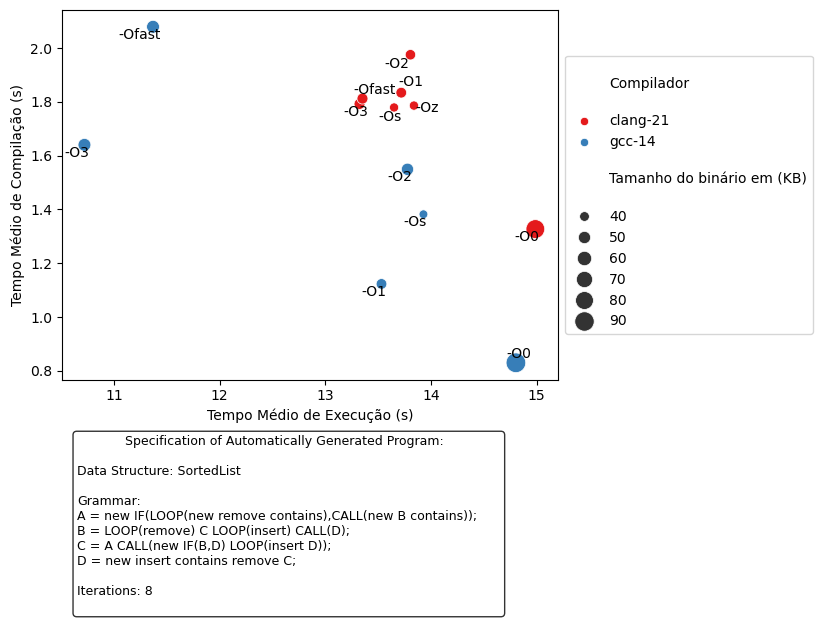

In [31]:
scatter = sb.scatterplot(data=data_grouped, x='execution_time_mean', y='compilation_time_mean', hue='compiler', size='binary_size_mean', sizes=(40, 200), hue_norm=(0, 7), palette='Set1')
scatter.legend(
    #title='Tempo de compilação',
    loc='center left',
    bbox_to_anchor=(1, 0.5)
)

for text in scatter.legend_.get_texts():
    if text.get_text() == 'binary_size_mean':
        text.set_text('\nTamanho do binário em (KB)\n')
    elif text.get_text() == 'compiler':
        text.set_text('\nCompilador\n')
        
texts = []
for i, row in data_grouped.iterrows():
    texts.append(plt.text(
        row['execution_time_mean'],
        row['compilation_time_mean'],
        row.name[1],
        fontsize=10,
        ha='center',
        va='center'
    ))

adjust_text(texts)
scatter.set_xlabel('Tempo Médio de Execução (s)')
scatter.set_ylabel('Tempo Médio de Compilação (s)')

texto_adicional = """            Specification of Automatically Generated Program:\n
Data Structure: SortedList\n
Grammar:
A = new IF(LOOP(new remove contains),CALL(new B contains));      
B = LOOP(remove) C LOOP(insert) CALL(D);   
C = A CALL(new IF(B,D) LOOP(insert D));   
D = new insert contains remove C;\n
Iterations: 8
"""

plt.text(
    0.03,
    -0.15,
    texto_adicional,
    fontsize=9,
    color='black',
    ha='left',
    va='top',
    transform=plt.gca().transAxes,
    bbox=dict(facecolor='white', alpha=0.8, edgecolor='black', boxstyle='round')
)

In [32]:
sortedlist_ex9_12 = dataframe[(dataframe['data_structure'] == 'sortedlist') & (dataframe['program'] == 'ex9') & (dataframe['iterations'] == 10)]

In [33]:
data_grouped = sortedlist_ex9_12.groupby(['compiler', 'opt']).agg({'binary_size': ['mean', 'median', 'std'], 'compilation_time': ['mean', 'median', 'std'], 'execution_time': ['mean', 'median', 'std']})

In [34]:
data_grouped.reset_index()
data_grouped.columns = ['_'.join(col).strip() for col in data_grouped.columns.values]

Text(0.03, -0.15, '\n            Specification of Automatically Generated Program:\n\nData Structure: SortedList\n\nGrammar:\nA = new IF(LOOP(new remove contains),CALL(new B contains));      \nB = LOOP(remove) C LOOP(insert) CALL(D);   \nC = A CALL(new IF(B,D) LOOP(insert D));   \nD = new insert contains remove C;\n\nIterations: 10\n')

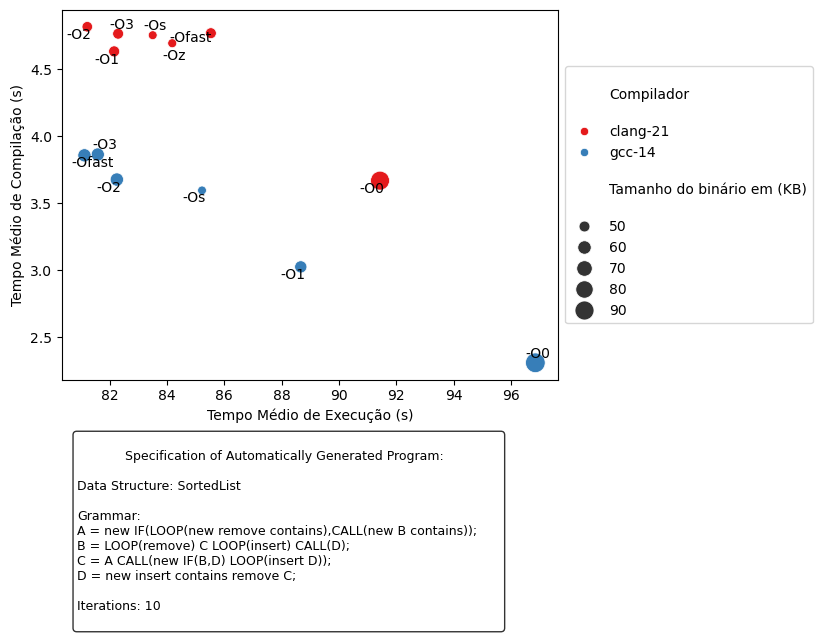

In [35]:
scatter = sb.scatterplot(data=data_grouped, x='execution_time_mean', y='compilation_time_mean', hue='compiler', size='binary_size_mean', sizes=(40, 200), hue_norm=(0, 7), palette='Set1')
scatter.legend(
    #title='Tempo de compilação',
    loc='center left',
    bbox_to_anchor=(1, 0.5)
)

for text in scatter.legend_.get_texts():
    if text.get_text() == 'binary_size_mean':
        text.set_text('\nTamanho do binário em (KB)\n')
    elif text.get_text() == 'compiler':
        text.set_text('\nCompilador\n')
        
texts = []
for i, row in data_grouped.iterrows():
    texts.append(plt.text(
        row['execution_time_mean'],
        row['compilation_time_mean'],
        row.name[1],
        fontsize=10,
        ha='center',
        va='center'
    ))

adjust_text(texts)
scatter.set_xlabel('Tempo Médio de Execução (s)')
scatter.set_ylabel('Tempo Médio de Compilação (s)')

texto_adicional = """
            Specification of Automatically Generated Program:\n
Data Structure: SortedList\n
Grammar:
A = new IF(LOOP(new remove contains),CALL(new B contains));      
B = LOOP(remove) C LOOP(insert) CALL(D);   
C = A CALL(new IF(B,D) LOOP(insert D));   
D = new insert contains remove C;\n
Iterations: 10
"""

plt.text(
    0.03,
    -0.15,
    texto_adicional,
    fontsize=9,
    color='black',
    ha='left',
    va='top',
    transform=plt.gca().transAxes,
    bbox=dict(facecolor='white', alpha=0.8, edgecolor='black', boxstyle='round')
)